Week 4, Assignment C1:

CAPM and Modern Portfolio Theory in Python

In this notebook, we will study Modern Portfolio Theory in Python.
Please complete the lines bellow where you see "# TODO".

In [1]:
#Objective 1.
#Use this cell to import Numpy (as np) and Pyplot (from Matplotlib as plt) packages.

import numpy as np
from matplotlib import pyplot as plt
#import pandas as pd 
#from sklearn.preprocessing import StandardScaler

In [16]:
#Objective 2.
#Select a number of asset classes ( > 1 ) "5" and a number of observations ( > 500 ) "550".  Store your chosen values to the
#two new variables "no_of_asset_classes" and "no_of_observations", respectively.


no_of_asset_classes =4
no_of_observations = 600

In [17]:
np.random.seed(123)
matrix_of_return_values = np.random.randn(no_of_asset_classes, no_of_observations)

#Objective 3.
#Select a number of test portfolios to generate ( > 1,000 < 20,000).  Store your chosen value to the new variable
#"no_of_portfolios".  

no_of_portfolios = 10000 

In [18]:
#Objective 4.
#Initialize four empty lists called "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios", respectively.

collection_of_random_asset_weights = []
portfolio_means = []
portfolio_standard_deviations = []
portfolio_sharpe_ratios = []

In [19]:
#Objective 5.
#Write a function called "get_random_asset_weights" that takes as input (Input.I) any number of asset classes
#"no_of_asset_classes" and returns (Output.I) a Numpy vector (matrix) of weights (percentages) of length "no_of_asset_classes"
#whose sum is one (1).

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights) 
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 
#print(get_random_asset_weights(no_of_asset_classes))

In [20]:
#Objective 6.
#Write a function called "get_portfolio_statistics" that takes as input (Input.I) a Numpy vector (matrix)
#"asset_weights" of weights (percentages) whose sum is one (1) and (Input.II) a Numpy matrix of return values
#"matrix_of_return_values" whose first axis length is the same as the length of the Numpy vector (matrix)
#"asset_weights" and returns (Output.I) the mean "portfolio_mean", (Output.II) the standard deviation
#"portfolio_standard_deviation", and (Output.III) the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of
#assets with asset weights "asset_weights" and asset return values belonging to "matrix_of_return_values".

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means.T 
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio 

In [21]:
#Objective 7.
#Using the functions constructed in Objectives 5 and 6, write a loop that, on each iteration, determines a
#Numpy vector (matrix) of weights (percentages) "random_asset_weights" of length "no_of_asset_classes" whose sum 
#is one (1) and then appends to each of the lists "collection_of_random_asset_weights", "portfolio_means",
#"portfolio_standard_deviations", and "portfolio_sharpe_ratios" the Numpy vector (matrix) of weights (percentages)
#"random_asset_weights"; and the mean "portfolio_mean", the standard deviation "portfolio_standard_deviation", and
#the Sharpe ratio "portfolio_sharpe_ratio" of the portfolio of assets with asset weights "asset_weights" and asset 
#return values belonging to "matrix_of_return_values", respectively.
    
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    A,B,C=get_portfolio_statistics(random_asset_weights, matrix_of_return_values)
    #print()
    portfolio_means.append(A)
    portfolio_standard_deviations.append(B)
    portfolio_sharpe_ratios.append(C)   
    
#print(collection_of_random_asset_weights)

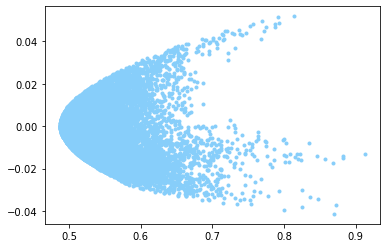

In [22]:
#Objective 8.
#Make a scatterplot of the corresponding values (x,y) = (portfolio_standard_deviation, portfolio_mean) from the
#lists "portfolio_standard_deviations" and "portfolio_means", respectively.

plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue') 
plt.show()

In [26]:
#Objective 9.
#Find the list index of the portfolio of highest Sharpe ratio.

index =  portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))
print(index)

896


In [27]:
#Objective 10.
#Print the asset weights and Sharpe ratio of the portfolio of highest Sharpe ratio, using index above.

print(collection_of_random_asset_weights[index])
print( portfolio_sharpe_ratios[index])

[[0.1615472  0.01150555 0.00317708 0.82377017]]
0.06526274218386272


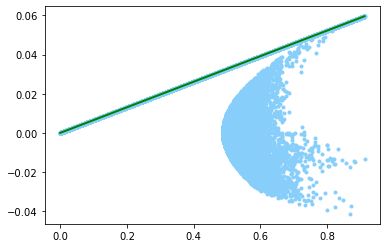

In [25]:
#Objective 11.
#Add the Capital Market Line to your scatterplot from Objective 8.

x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot(portfolio_standard_deviations, portfolio_means, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, 'o', markersize = 3, color = 'lightskyblue')
plt.plot(x, y, '-', linewidth = 2, color = 'green')
plt.show()

In [ ]:
#Objective 12.
#All of the work in this notebook assumes a risk-free rate of zero (0.00).  How could this work be modified to
#accommodate a nonzero risk-free rate?  Explain.

maybe if we changed the start point to be 0.1 .
